In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

In [2]:
class SpainGraphics:
    def __init__(self, data):
        self.comunidades = list(set([col for col in data['CCAA'].tolist() if len(col)==2]))
        self.data = data

    def get_data(self, comunidad):
        cond = (self.data['CCAA']==comunidad) & (self.data['Hospitalizados'].notnull()) & (self.data['UCI'].notnull()) & (self.data['Recuperados'].notnull()) & (self.data['Fallecidos'].notnull())
        self.df_comunidad = self.data[cond]
        self.define_confirmed()
        self.define_active_cases()

        return self.df_comunidad

    def get_figure(self, df_comunidad, titulo):
        ax = plt.gca()
        ax1 = df_comunidad.plot(kind='line', lw=4, grid=True, figsize=(15,10), ax=ax, style='.-', ms=20)
        ax2 = df_comunidad.plot(kind='bar', alpha=0, lw=4, grid=True, figsize=(15,10), ax=ax, legend=None)
        plt.title(f'{titulo}')
        return plt.gcf()

    def get_bars(self, df_comunidad, titulo):
        ax = plt.gca()
        ax3 = df_comunidad['NUEVOS'].plot(kind='bar', alpha=1, color='purple', grid=True, figsize=(15,10), ax=ax, legend=None)
        plt.title(f'{titulo}')
        return plt.gcf()
    
    def define_confirmed(self):
        res1 = [0 if isnan(x) else x for x in self.df_comunidad['TestAc+']]
        r1 = pd.Series(res1)
        res2 = [0 if isnan(x) else x for x in self.df_comunidad['PCR+']]
        r2 = pd.Series(res2)
        res3 = [0 if isnan(x) else x for x in self.df_comunidad['CASOS']]
        r3 = pd.Series(res3)
        self.df_comunidad['TOTAL'] = list(r1+r2+r3)
        
        self.df_comunidad['Activos'] = self.df_comunidad['TOTAL'] - self.df_comunidad['Fallecidos'] - self.df_comunidad['Recuperados']
        self.df_comunidad = self.df_comunidad.set_index('FECHA')

    def define_active_cases(self):
        daily_list = []
        for i, active in enumerate(self.df_comunidad['TOTAL']):
            if i==0:
                daily_list.append(active)
            else:
                daily_list.append(active-prev_active)
            prev_active = active
            
        self.df_comunidad['NUEVOS'] = daily_list

/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


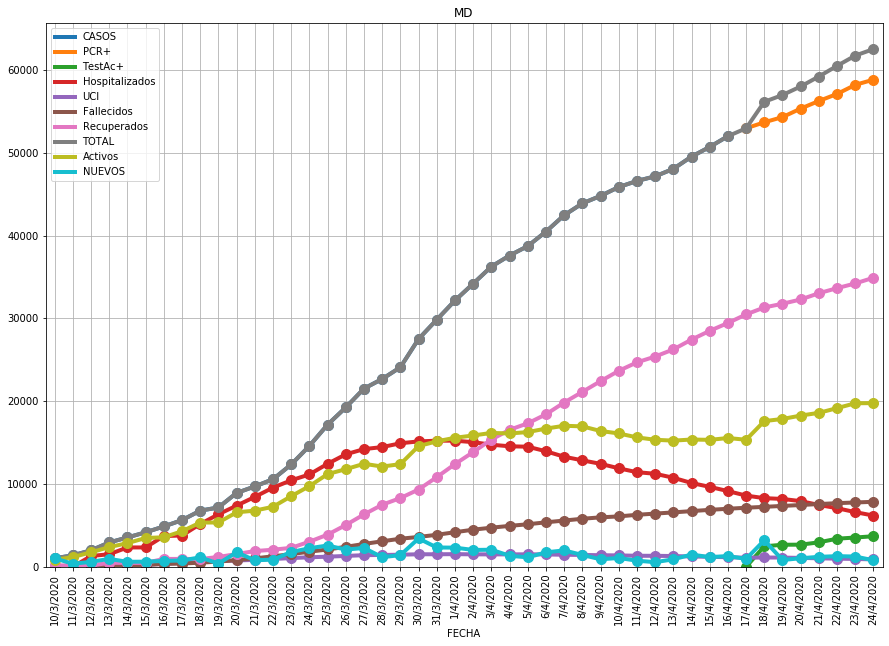

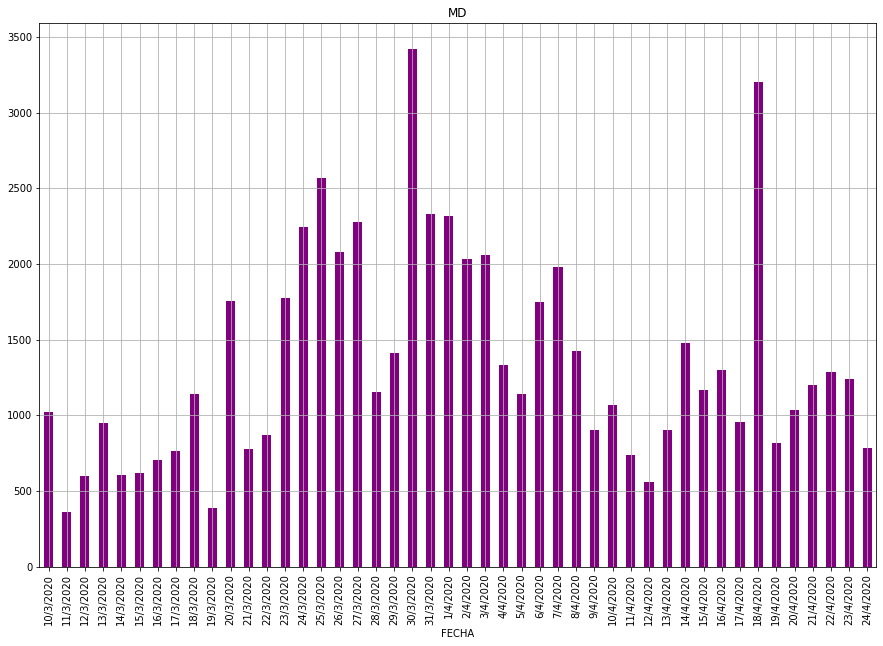

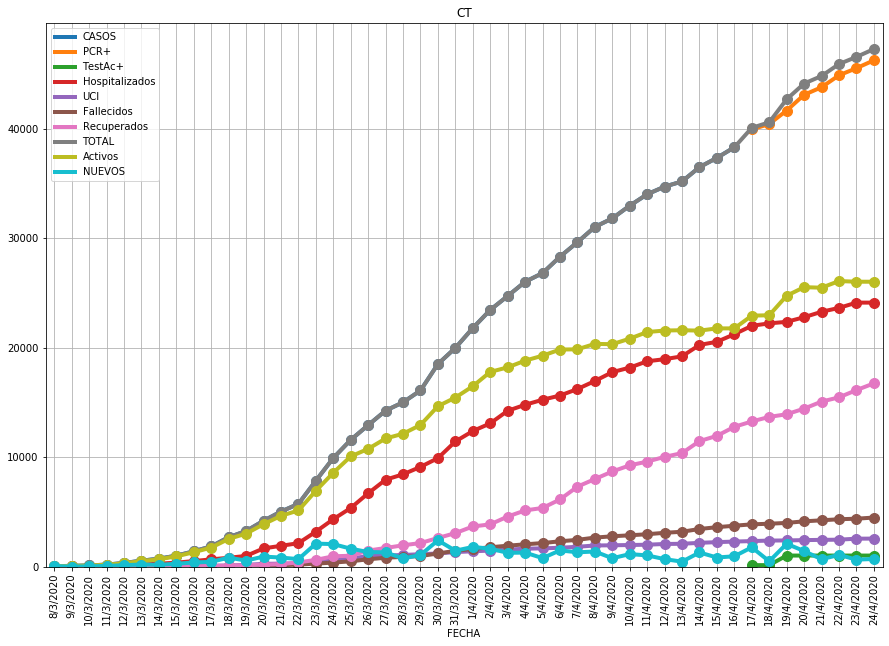

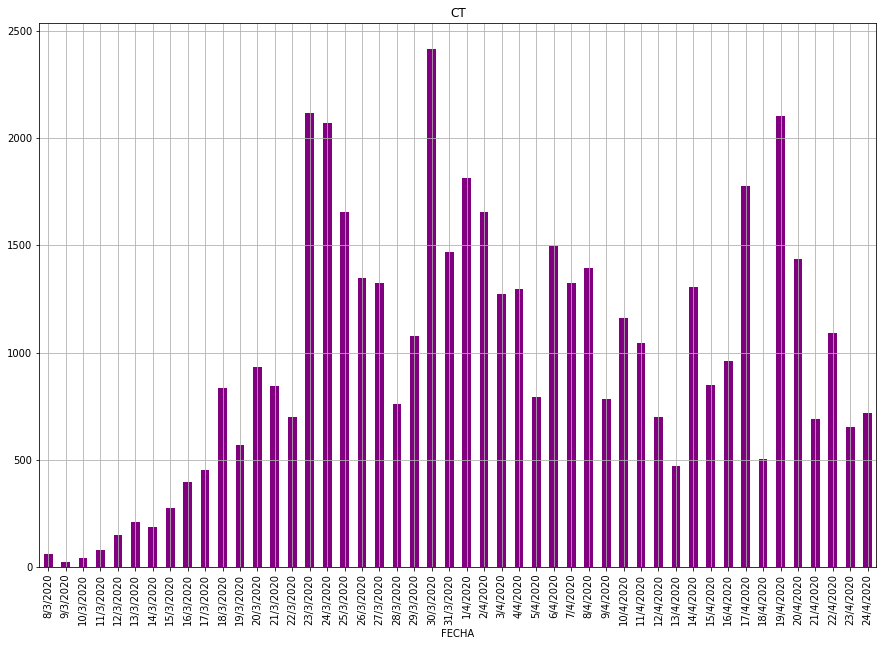

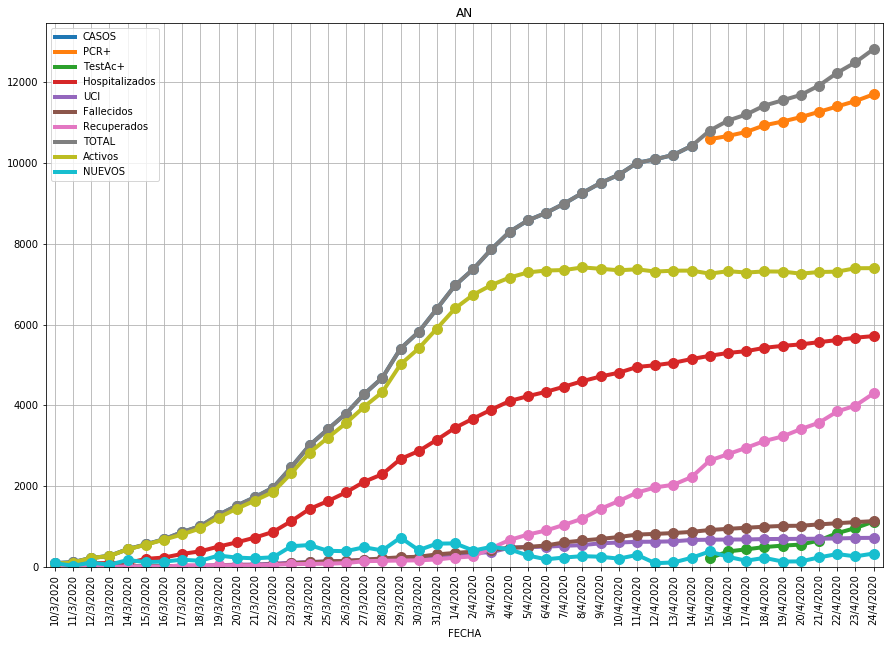

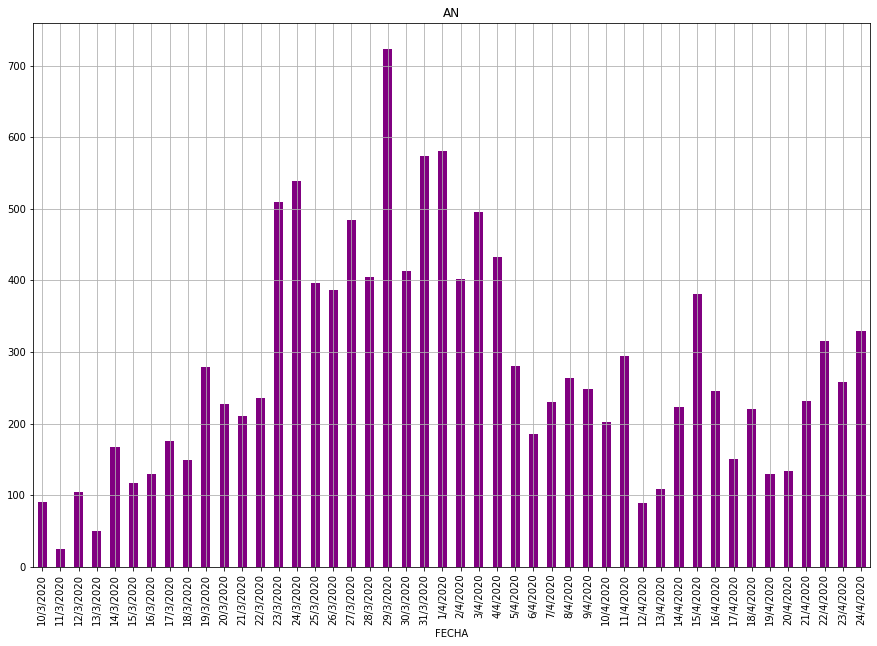

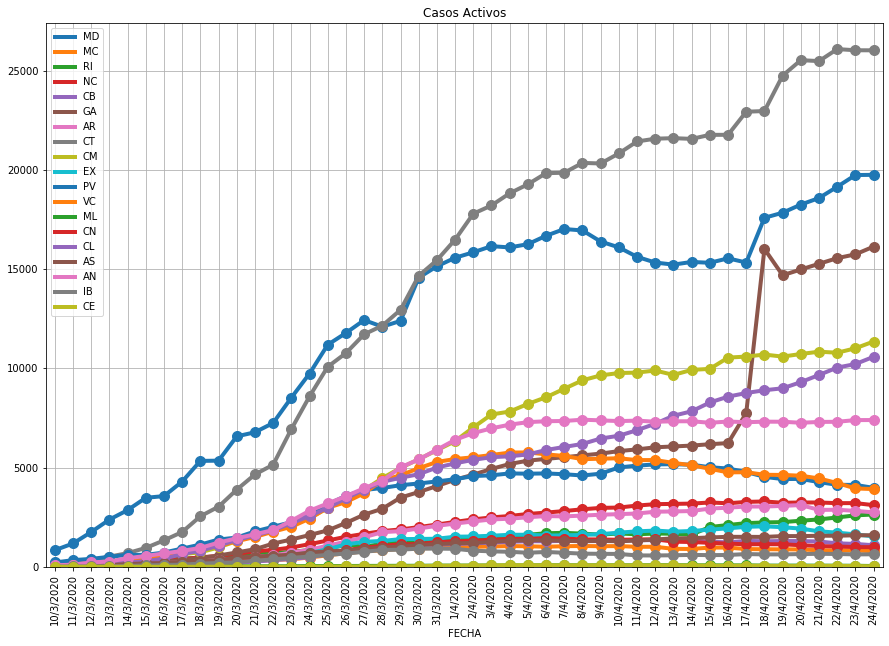

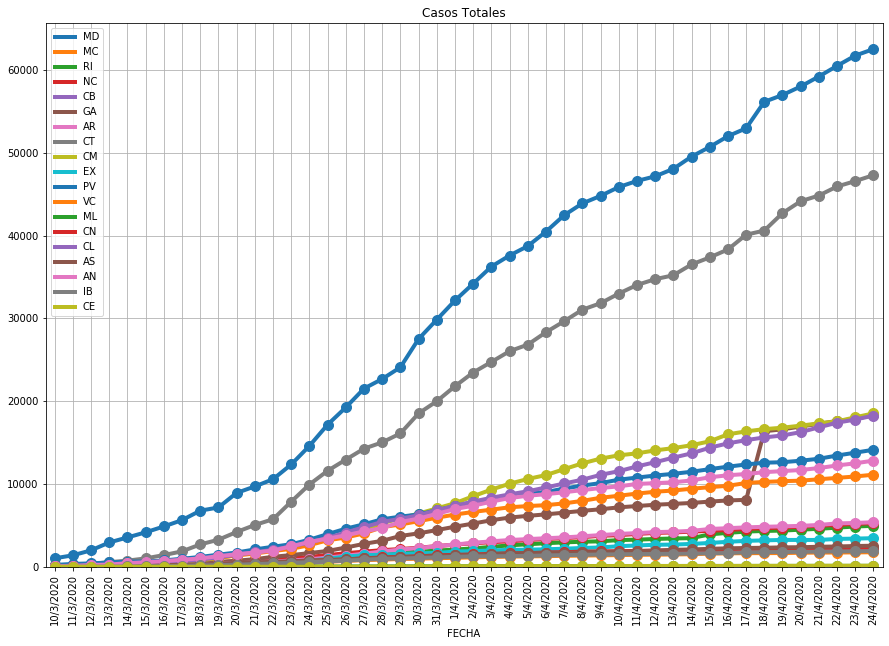

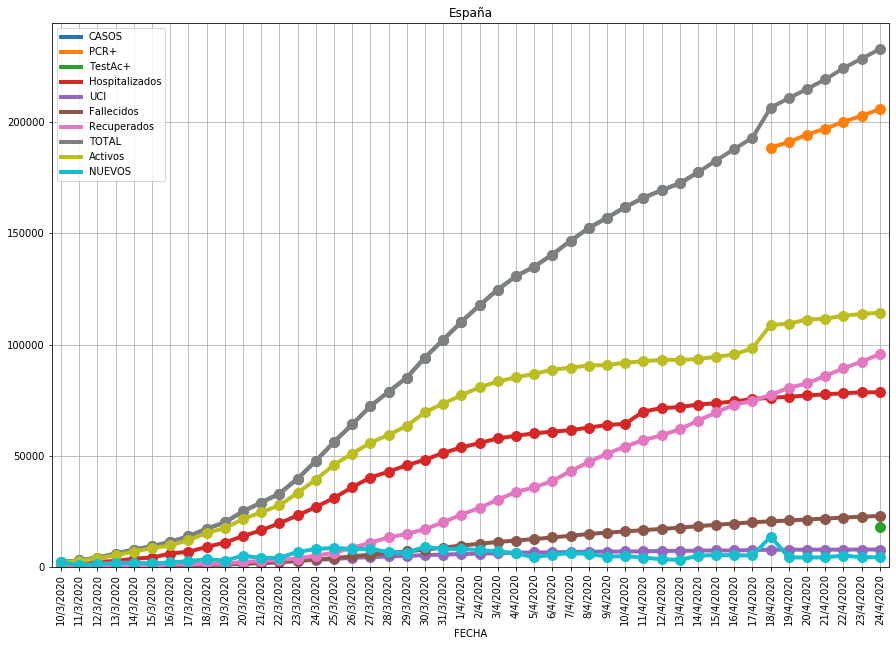

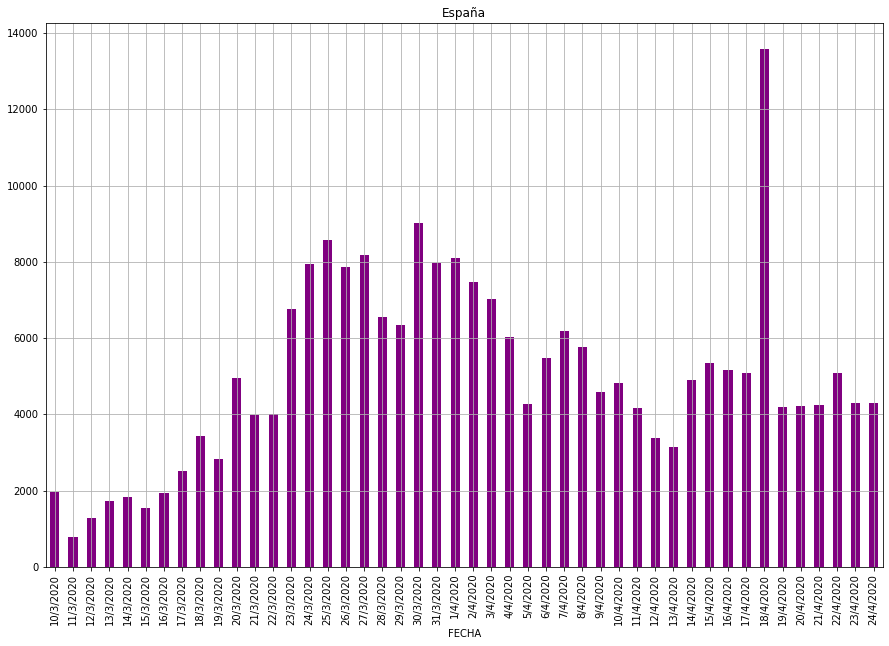

In [4]:
# NOTE Coger información del Ministerio de Salud
data = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", encoding='cp1252')

sg = SpainGraphics(data)
df_activos = pd.DataFrame()
df_totales = pd.DataFrame()

for i, comunidad in enumerate(sg.comunidades):
    if i==0:
        df_final = sg.get_data(comunidad)
    else:
        df_final += sg.get_data(comunidad)
    df_activos[comunidad] = sg.get_data(comunidad)['Activos']
    df_totales[comunidad] = sg.get_data(comunidad)['TOTAL']
    
    if comunidad in ['AN','MD','CT']:
        plt.show(sg.get_figure(sg.get_data(comunidad), comunidad))
        plt.show(sg.get_bars(sg.get_data(comunidad), comunidad))

# NOTE Comparar comunidades
plt.show(sg.get_figure(df_activos, 'Casos Activos'))
plt.show(sg.get_figure(df_totales, 'Casos Totales'))

# NOTE España
plt.show(sg.get_figure(df_final, 'España'))
plt.show(sg.get_bars(df_final, 'España'))